# Exploratory Data Analysis

This notebook explores the League of Legends Diamond Ranked Games dataset to understand:
- Dataset structure and basic statistics
- Target variable distribution
- Feature distributions and relationships
- Data quality checks
- Potential insights for modeling


In [18]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import project utilities
import sys
from pathlib import Path
# Add project root to path (notebooks are in notebooks/ folder, src is in parent)
project_root = Path(__file__).parent.parent if '__file__' in globals() else Path('../').resolve()
sys.path.insert(0, str(project_root))
from src import data, viz

warnings.filterwarnings('ignore')

# Set style
viz.set_plot_style()

# Set random seed for reproducibility
np.random.seed(42)


## 1. Load Data


In [19]:
# Load the dataset
df = data.load_data('../data/raw/high_diamond_ranked_10min.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")


Dataset shape: (9879, 40)
Number of rows: 9,879
Number of columns: 40


## 2. Basic Information


In [20]:
# Display basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [21]:
# Check for duplicate gameIds
print(f"Total games: {len(df)}")
print(f"Unique gameIds: {df['gameId'].nunique()}")
print(f"Duplicate gameIds: {df['gameId'].duplicated().sum()}")

if df['gameId'].duplicated().sum() > 0:
    print("\nWarning: There are duplicate gameIds!")
    print(df[df['gameId'].duplicated(keep=False)].sort_values('gameId').head(10))
else:
    print("\n[OK] No duplicate gameIds found")


Total games: 9879
Unique gameIds: 9879
Duplicate gameIds: 0

[OK] No duplicate gameIds found


## 3. Missing Values


In [22]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

missing_df = missing_df[missing_df['Missing Count'] > 0]

if len(missing_df) > 0:
    print("Columns with missing values:")
    print(missing_df)
else:
    print("[OK] No missing values found in the dataset")


[OK] No missing values found in the dataset


## 4. Target Variable Analysis


Target Variable Distribution (blueWins):
  Blue Wins (1): 4,930 (49.90%)
  Blue Loses (0): 4,949 (50.10%)

  Class balance ratio: 0.996


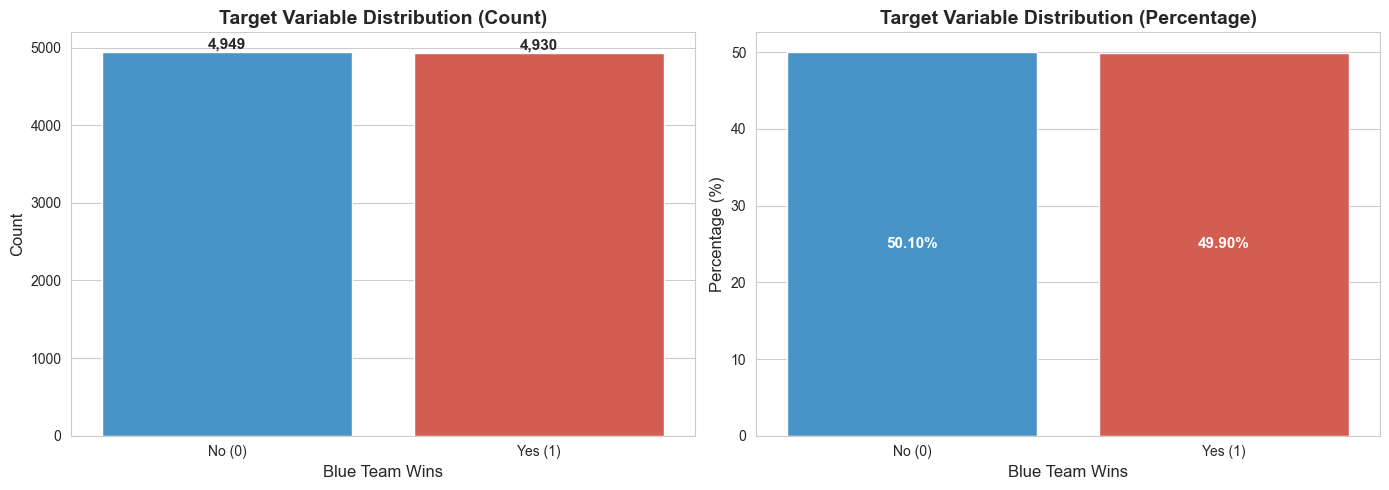

In [23]:
# Target variable distribution
target_counts = df['blueWins'].value_counts()
target_pct = df['blueWins'].value_counts(normalize=True) * 100

print("Target Variable Distribution (blueWins):")
print(f"  Blue Wins (1): {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"  Blue Loses (0): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"\n  Class balance ratio: {min(target_counts) / max(target_counts):.3f}")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='blueWins', ax=axes[0], palette=['#3498db', '#e74c3c'])
axes[0].set_title('Target Variable Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Blue Team Wins', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No (0)', 'Yes (1)'])

# Add count labels
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Percentage plot
sns.barplot(data=df, x='blueWins', y='blueWins', estimator=lambda x: len(x) / len(df) * 100, 
            ax=axes[1], palette=['#3498db', '#e74c3c'])
axes[1].set_title('Target Variable Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Blue Team Wins', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_xticklabels(['No (0)', 'Yes (1)'])

# Add percentage labels
for i, v in enumerate(target_pct.values):
    axes[1].text(i, v/2, f'{v:.2f}%', ha='center', va='center', fontsize=11, fontweight='bold', color='white')

plt.tight_layout()
plt.show()


## 5. Summary Statistics


In [24]:
# Exclude gameId and target variable for statistical summary
feature_cols = [col for col in df.columns if col not in ['gameId', 'blueWins']]

# Display summary statistics
print("Summary Statistics for Features:")
df[feature_cols].describe()


Summary Statistics for Features:


,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


## 6. Feature Categories

Let's categorize features to better understand the dataset structure.


In [25]:
# Categorize features
blue_features = [col for col in df.columns if col.startswith('blue') and col != 'blueWins']
red_features = [col for col in df.columns if col.startswith('red')]

# Remove 'blue' and 'red' prefixes to find matching pairs
blue_base = [col.replace('blue', '') for col in blue_features]
red_base = [col.replace('red', '') for col in red_features]

print(f"Blue team features: {len(blue_features)}")
print(f"Red team features: {len(red_features)}")
print(f"\nMatching feature pairs: {len(set(blue_base) & set(red_base))}")

# Feature categories
categories = {
    'Combat': ['Kills', 'Deaths', 'Assists', 'FirstBlood'],
    'Objectives': ['Dragons', 'Heralds', 'EliteMonsters', 'TowersDestroyed'],
    'Resources': ['TotalGold', 'GoldDiff', 'GoldPerMin', 'TotalExperience', 'ExperienceDiff'],
    'Vision': ['WardsPlaced', 'WardsDestroyed'],
    'Farming': ['TotalMinionsKilled', 'TotalJungleMinionsKilled', 'CSPerMin'],
    'Level': ['AvgLevel']
}

print("\nFeature Categories:")
for category, keywords in categories.items():
    matching = [f for f in blue_base if any(kw in f for kw in keywords)]
    print(f"  {category}: {len(matching)} features")


Blue team features: 19
Red team features: 19

Matching feature pairs: 19

Feature Categories:
  Combat: 4 features
  Objectives: 4 features
  Resources: 5 features
  Vision: 2 features
  Farming: 3 features
  Level: 1 features


## 7. Feature Distributions


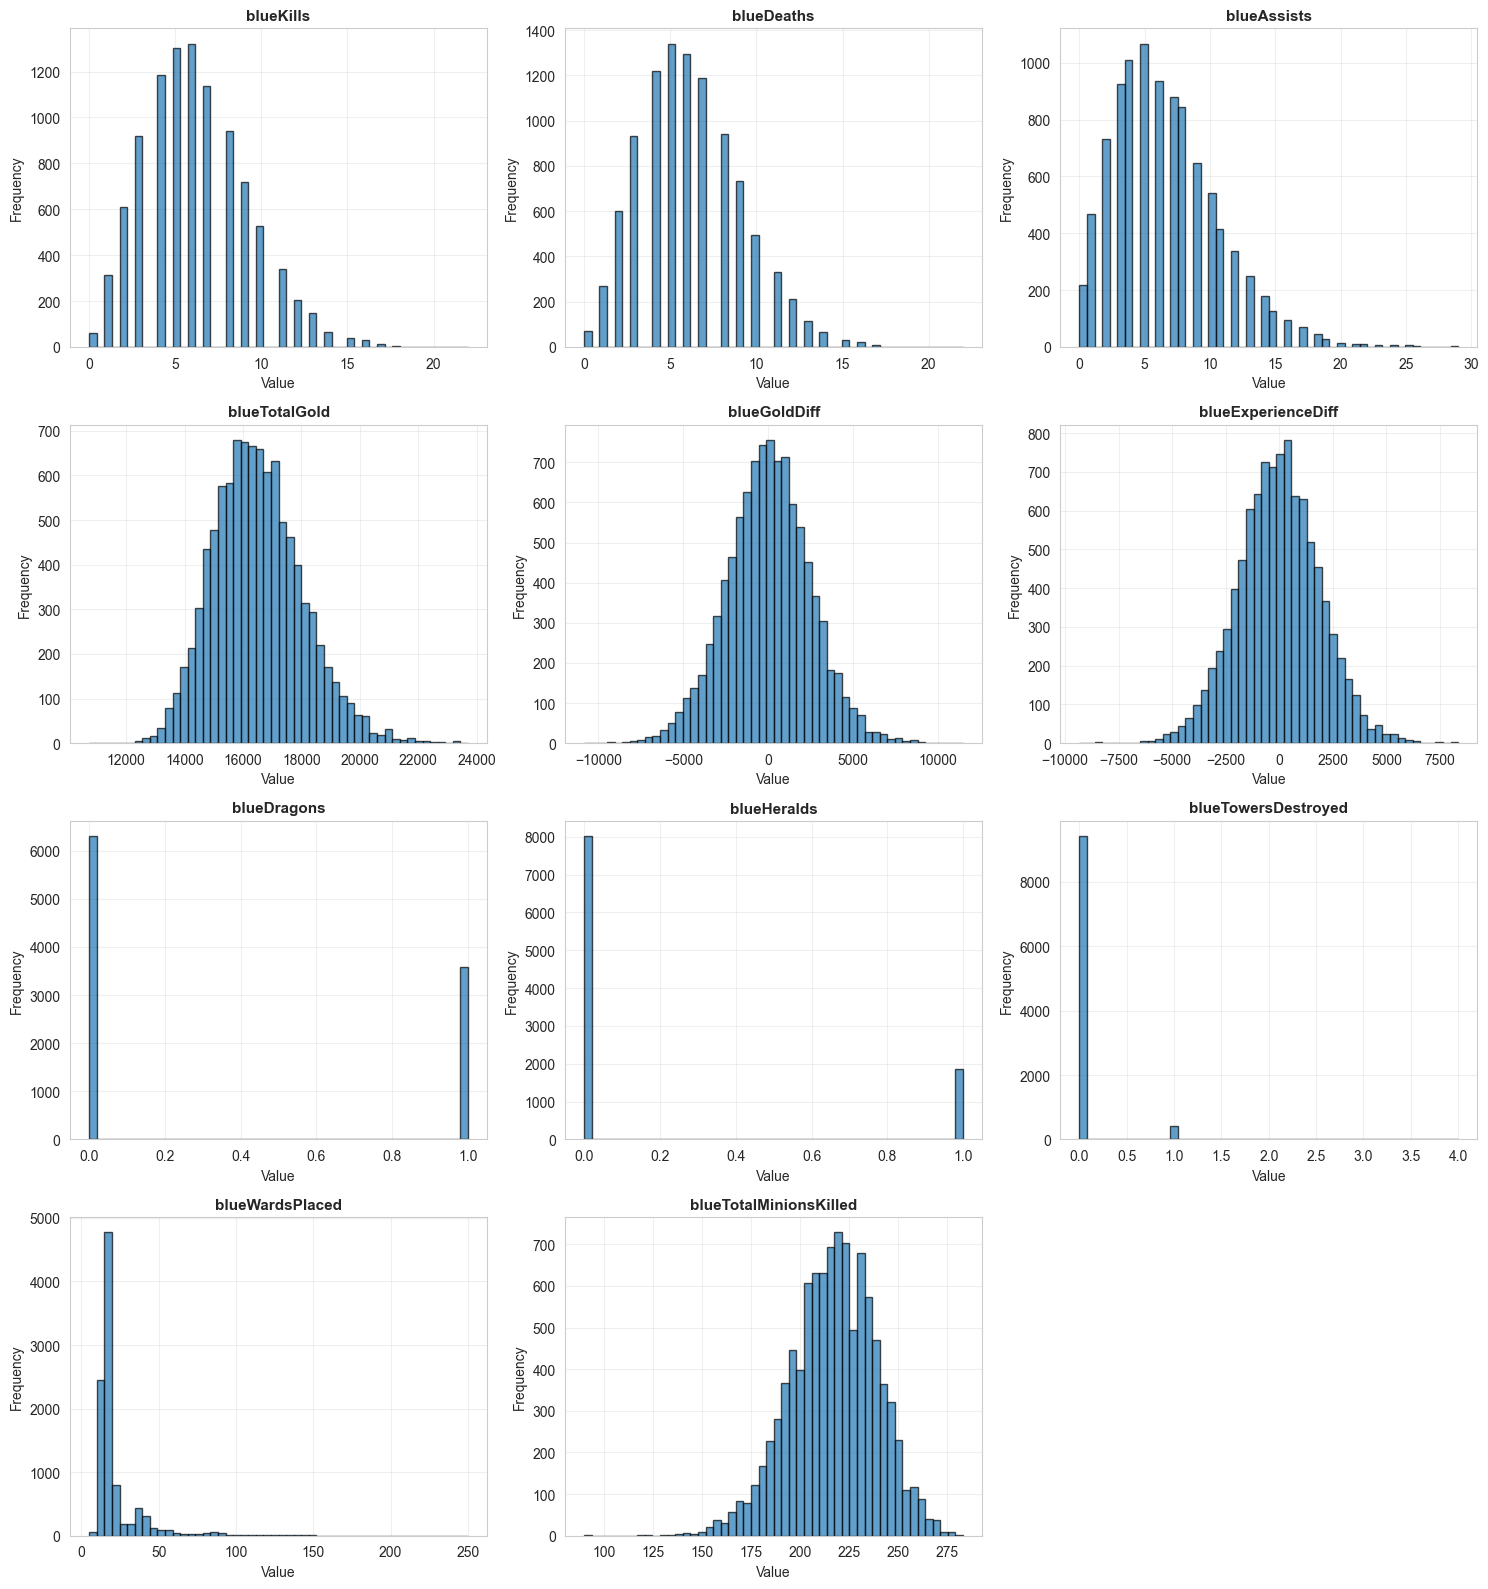

In [26]:
# Select key features for visualization
key_features = [
    'blueKills', 'blueDeaths', 'blueAssists',
    'blueTotalGold', 'blueGoldDiff', 'blueExperienceDiff',
    'blueDragons', 'blueHeralds', 'blueTowersDestroyed',
    'blueWardsPlaced', 'blueTotalMinionsKilled'
]

# Create distribution plots
n_cols = 3
n_rows = (len(key_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    ax = axes[i]
    df[feature].hist(bins=50, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(True, alpha=0.3)

# Hide extra subplots
for i in range(len(key_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


## 8. Feature Relationships with Target


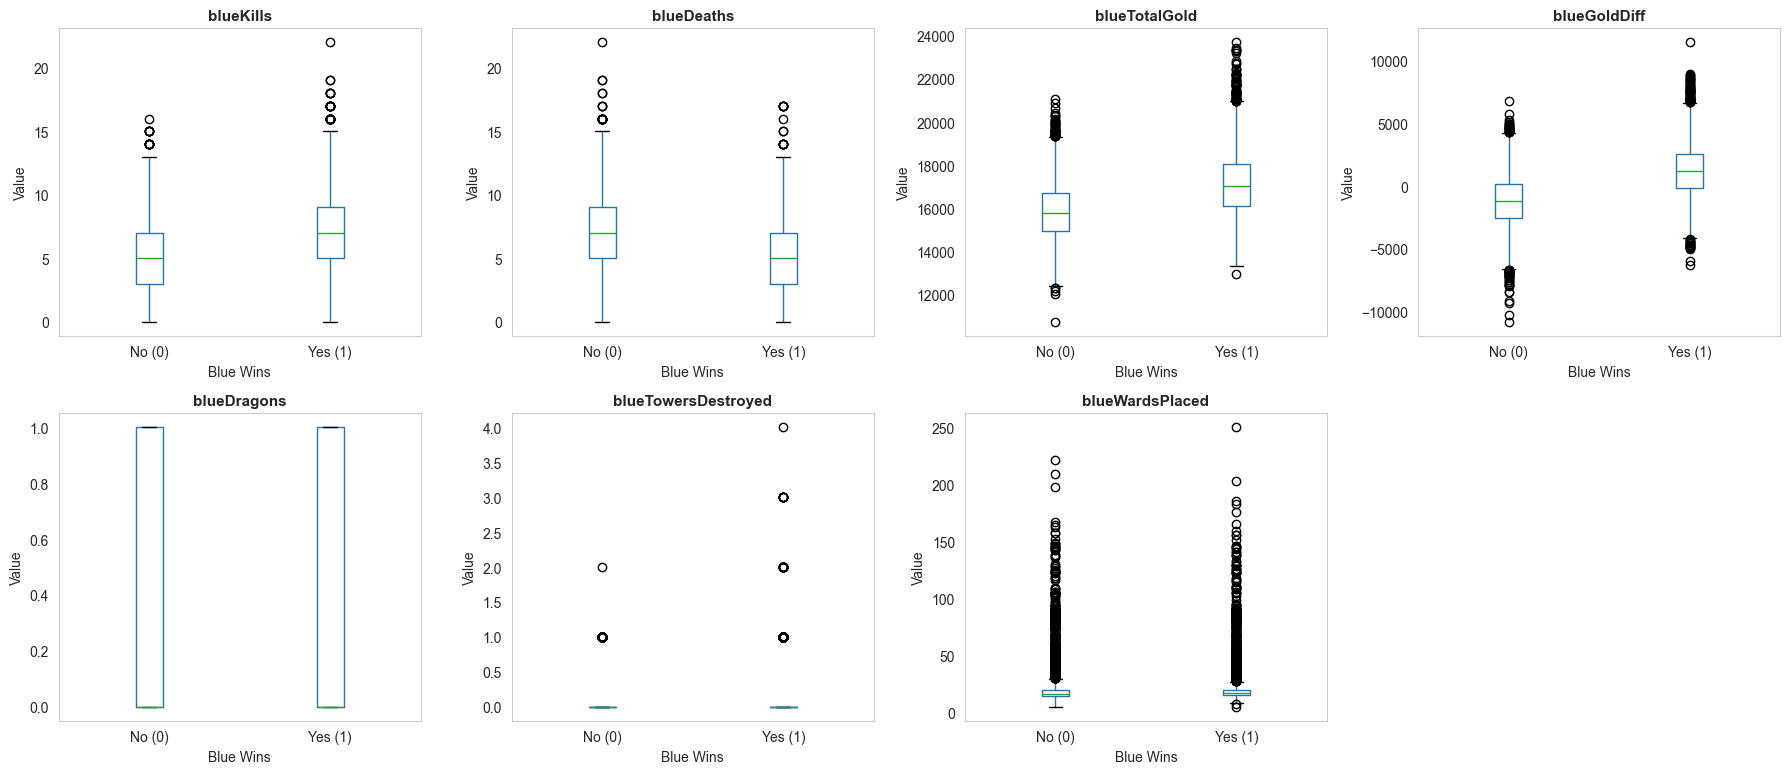

In [27]:
# Compare key features by target class
comparison_features = [
    'blueKills', 'blueDeaths', 'blueTotalGold', 'blueGoldDiff',
    'blueDragons', 'blueTowersDestroyed', 'blueWardsPlaced'
]

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, feature in enumerate(comparison_features):
    ax = axes[i]
    
    # Create box plots
    df.boxplot(column=feature, by='blueWins', ax=ax, grid=False)
    ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Blue Wins', fontsize=10)
    ax.set_ylabel('Value', fontsize=10)
    ax.set_xticklabels(['No (0)', 'Yes (1)'])
    
    # Remove default title
    plt.suptitle('')

# Hide last subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


## 9. Correlation Analysis


In [28]:
# Calculate correlation with target
correlations = df[feature_cols + ['blueWins']].corr()['blueWins'].sort_values(ascending=False)
correlations = correlations.drop('blueWins')

print("Top 10 Features Most Correlated with Blue Wins (Positive):")
print(correlations.head(10))
print("\nTop 10 Features Most Correlated with Blue Wins (Negative):")
print(correlations.tail(10))


Top 10 Features Most Correlated with Blue Wins (Positive):
blueGoldDiff           0.511119
blueExperienceDiff     0.489558
blueTotalGold          0.417213
blueGoldPerMin         0.417213
blueTotalExperience    0.396141
blueAvgLevel           0.357820
blueKills              0.337358
redDeaths              0.337358
blueAssists            0.276685
blueCSPerMin           0.224909
Name: blueWins, dtype: float64

Top 10 Features Most Correlated with Blue Wins (Negative):
redEliteMonsters     -0.221551
redAssists           -0.271047
blueDeaths           -0.339297
redKills             -0.339297
redAvgLevel          -0.352127
redTotalExperience   -0.387588
redGoldPerMin        -0.411396
redTotalGold         -0.411396
redExperienceDiff    -0.489558
redGoldDiff          -0.511119
Name: blueWins, dtype: float64


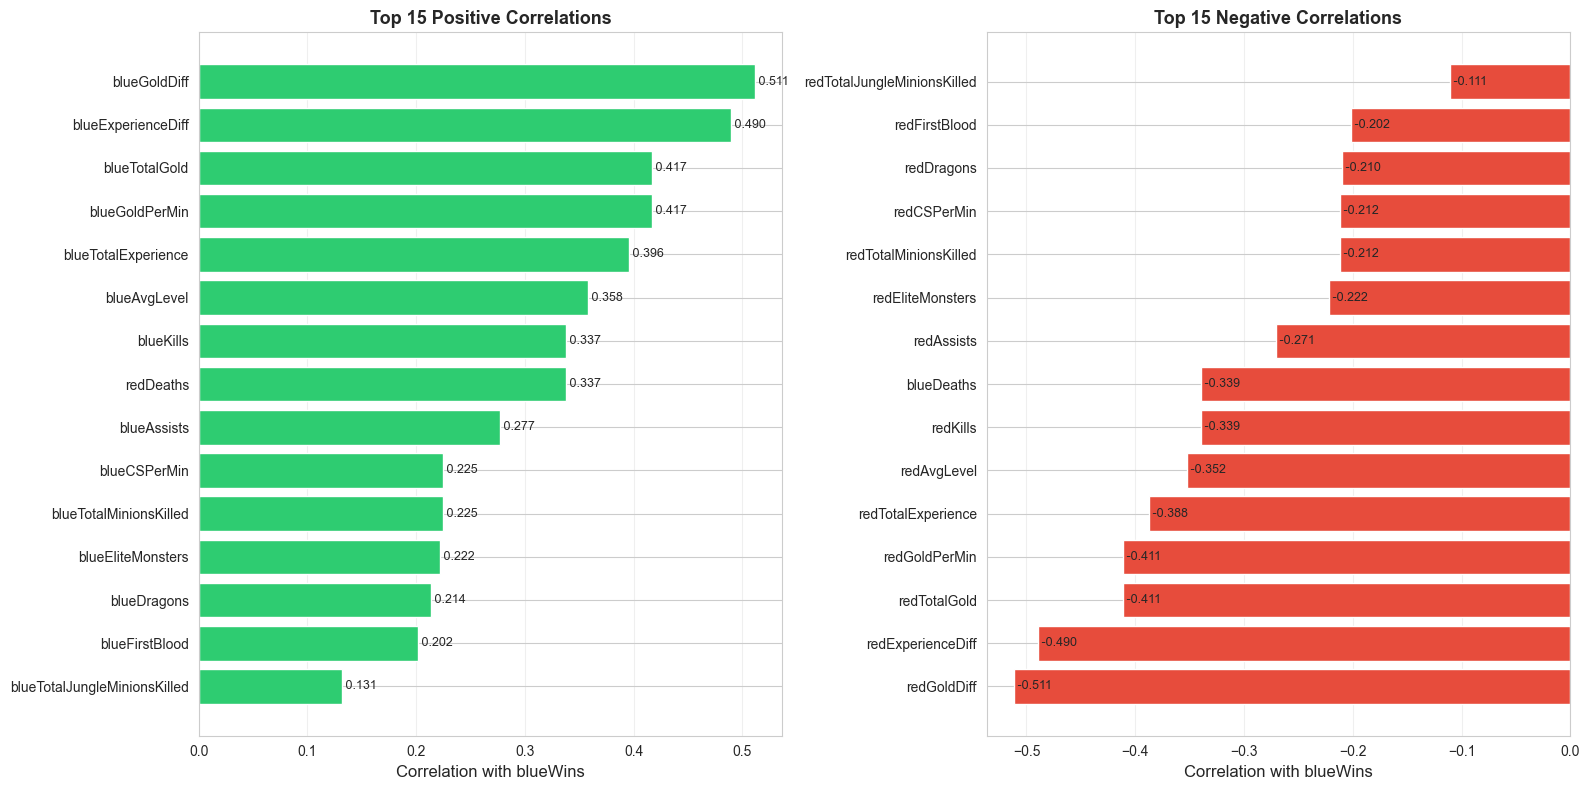

In [29]:
# Visualize top correlations
top_n = 15
top_positive = correlations.head(top_n)
top_negative = correlations.tail(top_n)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Positive correlations
axes[0].barh(range(len(top_positive)), top_positive.values, color='#2ecc71')
axes[0].set_yticks(range(len(top_positive)))
axes[0].set_yticklabels(top_positive.index, fontsize=10)
axes[0].set_xlabel('Correlation with blueWins', fontsize=12)
axes[0].set_title(f'Top {top_n} Positive Correlations', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Add value labels
for i, v in enumerate(top_positive.values):
    axes[0].text(v, i, f' {v:.3f}', va='center', fontsize=9)

# Negative correlations
axes[1].barh(range(len(top_negative)), top_negative.values, color='#e74c3c')
axes[1].set_yticks(range(len(top_negative)))
axes[1].set_yticklabels(top_negative.index, fontsize=10)
axes[1].set_xlabel('Correlation with blueWins', fontsize=12)
axes[1].set_title(f'Top {top_n} Negative Correlations', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

# Add value labels
for i, v in enumerate(top_negative.values):
    axes[1].text(v, i, f' {v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


## 10. Feature Correlation Heatmap


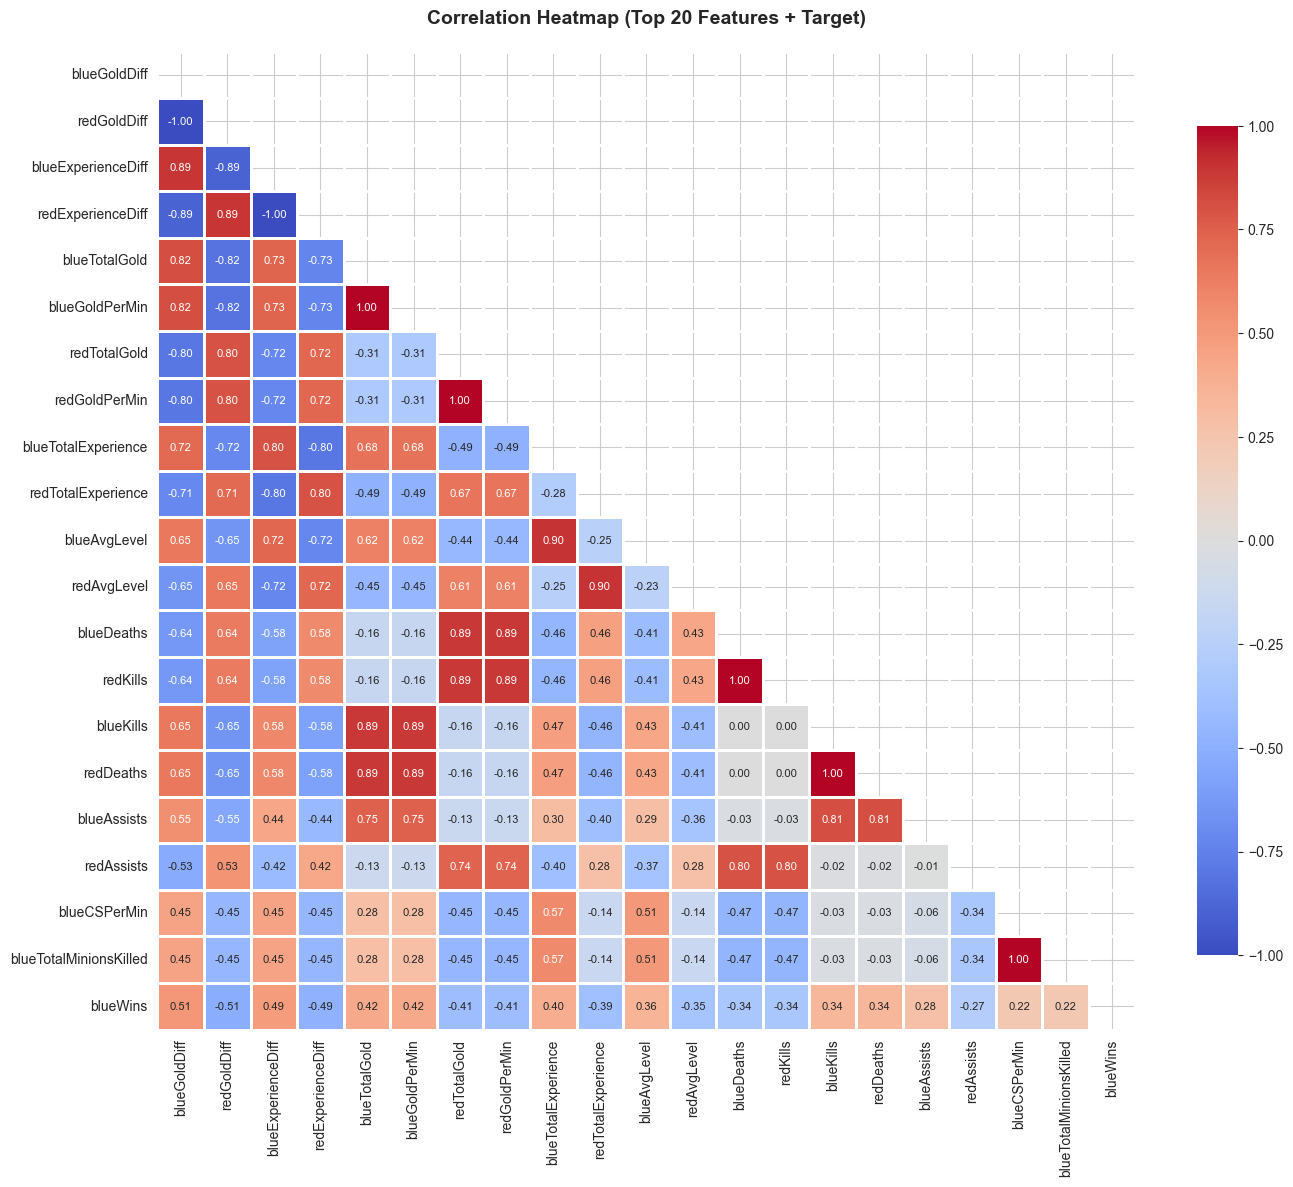

In [30]:
# Select most important features for correlation heatmap
important_features = correlations.abs().nlargest(20).index.tolist() + ['blueWins']

# Calculate correlation matrix
corr_matrix = df[important_features].corr()

# Create heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, annot_kws={'fontsize': 8})
plt.title('Correlation Heatmap (Top 20 Features + Target)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## 11. Data Quality Checks


In [31]:
# Check for potential data quality issues

print("Data Quality Checks:")
print("=" * 50)

# Check for negative values where they shouldn't exist
non_negative_features = ['blueKills', 'blueDeaths', 'blueAssists', 'blueTotalGold', 
                         'blueTotalMinionsKilled', 'blueWardsPlaced', 'blueDragons', 
                         'blueHeralds', 'blueTowersDestroyed']

print("\n1. Negative values check (for non-negative features):")
for feature in non_negative_features:
    negative_count = (df[feature] < 0).sum()
    if negative_count > 0:
        print(f"   [WARNING] {feature}: {negative_count} negative values")
    else:
        print(f"   [OK] {feature}: No negative values")

# Check for extreme outliers
print("\n2. Extreme outliers check (values > 3 standard deviations):")
for feature in key_features[:5]:  # Check first 5 key features
    mean = df[feature].mean()
    std = df[feature].std()
    outliers = ((df[feature] - mean).abs() > 3 * std).sum()
    outlier_pct = (outliers / len(df)) * 100
    print(f"   {feature}: {outliers} outliers ({outlier_pct:.2f}%)")

# Check for constant features (zero variance)
print("\n3. Constant features check:")
constant_features = []
for col in feature_cols:
    if df[col].nunique() <= 1:
        constant_features.append(col)
if constant_features:
    print(f"   [WARNING] Found {len(constant_features)} constant features: {constant_features}")
else:
    print("   [OK] No constant features found")


Data Quality Checks:

1. Negative values check (for non-negative features):
   [OK] blueKills: No negative values
   [OK] blueDeaths: No negative values
   [OK] blueAssists: No negative values
   [OK] blueTotalGold: No negative values
   [OK] blueTotalMinionsKilled: No negative values
   [OK] blueWardsPlaced: No negative values
   [OK] blueDragons: No negative values
   [OK] blueHeralds: No negative values
   [OK] blueTowersDestroyed: No negative values

2. Extreme outliers check (values > 3 standard deviations):
   blueKills: 50 outliers (0.51%)
   blueDeaths: 65 outliers (0.66%)
   blueAssists: 92 outliers (0.93%)
   blueTotalGold: 54 outliers (0.55%)
   blueGoldDiff: 47 outliers (0.48%)

3. Constant features check:
   [OK] No constant features found


## 12. Key Insights and Summary


In [32]:
print("=" * 60)
print("EDA SUMMARY")
print("=" * 60)

print(f"\nDataset Overview:")
print(f"   • Total games: {len(df):,}")
print(f"   • Features: {len(feature_cols)}")
print(f"   • Target: blueWins (binary)")

print(f"\nTarget Distribution:")
print(f"   • Blue wins: {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"   • Blue loses: {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"   • Class balance: {'Balanced' if abs(target_pct[1] - 50) < 5 else 'Imbalanced'}")

print(f"\nTop 5 Features Most Correlated with Blue Wins:")
for i, (feature, corr) in enumerate(correlations.head(5).items(), 1):
    print(f"   {i}. {feature}: {corr:.4f}")

print(f"\nData Quality:")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Duplicate gameIds: {df['gameId'].duplicated().sum()}")

print("\n" + "=" * 60)
print("\nKey Takeaways for Modeling:")
print("   1. Dataset appears clean with no missing values")
print("   2. Target is relatively balanced")
print("   3. Gold-related features show strong correlation with wins")
print("   4. Consider feature engineering (e.g., advantage deltas)")
print("   5. All features are from early game (first ~10 minutes)")
print("=" * 60)


EDA SUMMARY

Dataset Overview:
   • Total games: 9,879
   • Features: 38
   • Target: blueWins (binary)

Target Distribution:
   • Blue wins: 4,930 (49.90%)
   • Blue loses: 4,949 (50.10%)
   • Class balance: Balanced

Top 5 Features Most Correlated with Blue Wins:
   1. blueGoldDiff: 0.5111
   2. blueExperienceDiff: 0.4896
   3. blueTotalGold: 0.4172
   4. blueGoldPerMin: 0.4172
   5. blueTotalExperience: 0.3961

Data Quality:
   • Missing values: 0
   • Duplicate gameIds: 0


Key Takeaways for Modeling:
   1. Dataset appears clean with no missing values
   2. Target is relatively balanced
   3. Gold-related features show strong correlation with wins
   4. Consider feature engineering (e.g., advantage deltas)
   5. All features are from early game (first ~10 minutes)
